# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

fatal: destination path 'machine_learning_1' already exists and is not an empty directory.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

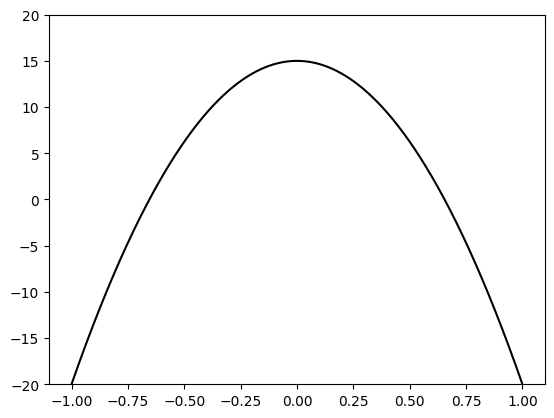

In [3]:
# Our original polynomial is -x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

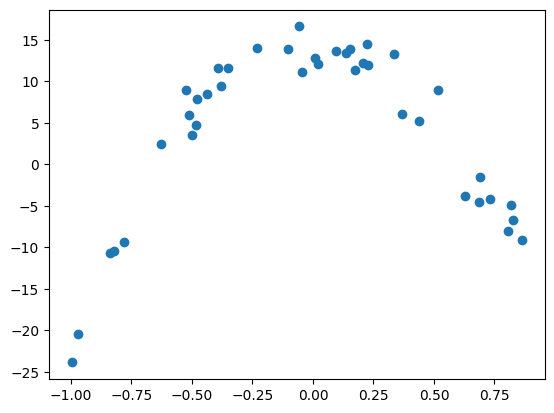

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [6]:
for datasample in zip(X,Y):
    print(datasample)

(0.6888437030500962, -1.503313676546703)
(-0.4821664994140733, 4.776223391096098)
(0.02254944273721704, 12.087957039273702)
(-0.3933745478421451, 11.552655381342872)
(-0.04680609169528838, 11.13939451533042)
(0.009373711634780513, 12.810729063756577)
(-0.43632431120059234, 8.437955069843738)
(-0.4989873172751189, 3.511211911084044)
(0.8194925119364802, -4.879955934160179)
(0.8043319008791654, -8.0368585173616)
(-0.37970486136133474, 9.412786903432224)
(0.36796786383088254, 6.014161594638752)
(-0.055714569094573285, 16.612588226930765)
(0.2217739468876032, 14.540743210654112)
(0.8260221064757964, -6.653701461777612)
(0.7306198555432801, -4.157483878852887)
(-0.47901537921608117, 7.82406268607659)
(-0.9719165996719621, -20.435354443047032)
(0.43940937280790826, 5.238271435416371)
(0.3363064024637017, 13.258006206843095)
(-0.9977143613711434, -23.858802994572372)
(-0.512178246225736, 5.980815567451724)
(-0.3495912745052199, 11.6168873009973)
(0.13502148124134372, 13.415138003037914)
(-0.5

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [7]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(200,include_bias=False)
    X=poly.fit_transform(X.reshape(-1, 1))
    return X
X_poly=addPoly(X,200)

In [8]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2)

In [10]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [11]:
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)

LinearRegression()

Training error (rmse): 0.4790416974033773
Testing error (rmse): 22922173639536.047


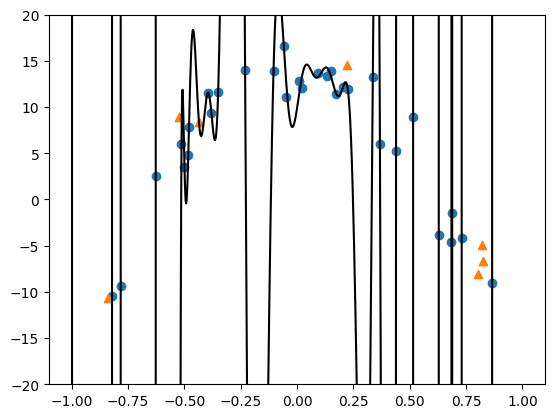

Polynomial coefficients
[9.835742820630797, 161.7620284525957, 1454.8185782618636, -83018.0995306343, 184069.23384603512, 10006281.130409777, -46128515.16211568, -438869440.41721916, 2352668274.7783365, 10087852495.055992, -55798343229.43875, -143479382385.9537, 748678403445.8428, 1353958288246.4507, -6136508719171.008, -8581984987674.427, 31457562238961.945, 35535228340149.86, -98870949395215.23, -89354571301100.36, 173482995555508.28, 112416816895656.1, -114180570938705.02, -13993036132824.152, -80754610498127.53, -84601529473219.48, 77937695838244.98, -16328150455179.627, 98177981802466.42, 54875929823017.65, 14918434215595.13, 61297224038704.42, -62321418441205.9, 23801259257600.867, -85121279797804.52, -17472206893303.764, -62427952182836.22, -41214346528897.83, -20611375635507.383, -44961344840304.9, 19539535312419.684, -35891764946199.695, 47872597565425.36, -22023990999153.93, 63026281846903.555, -8559241553663.735, 66911313749525.22, 1899855219141.5647, 63357034904862.26, 8705

In [12]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [13]:
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.1)
model_L1_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

Training error (rmse): 2.0598690553389796
Testing error (rmse): 2.381575399730924


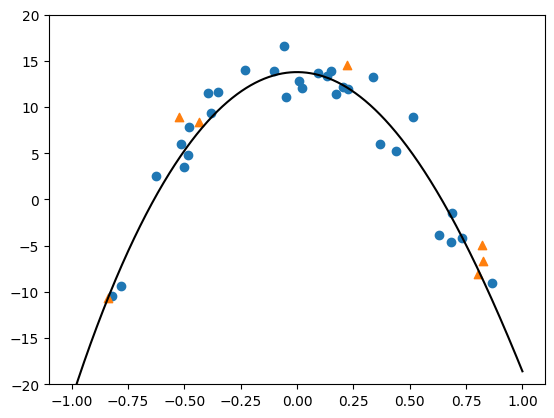

Polynomial coefficients
[13.784955398111999, -0.0, -33.90565550341105, 0.0, -0.0, 1.5244785892880361, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0

In [14]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [15]:
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.1)
model_L2_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

Training error (rmse): 1.9624145149362509
Testing error (rmse): 3.3682910731200115


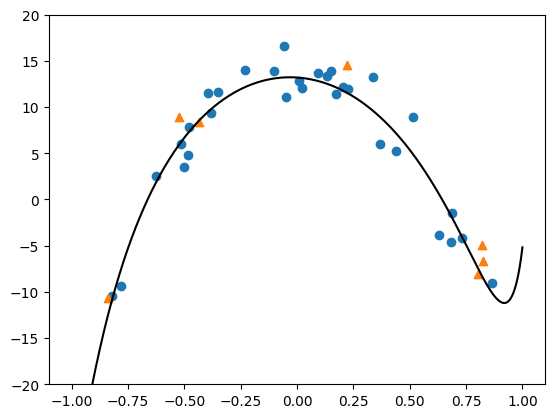

Polynomial coefficients
[13.200241902595831, -1.6241568120014893, -25.93074914445372, 0.541784449541078, -10.28612292251161, 2.101455227982912, -3.115109051636521, 2.6305144588005906, -0.27983761660678996, 2.480346477912746, 0.744018473088635, 2.0579176764838936, 1.0233050302558637, 1.5971724780357497, 1.0070750522732927, 1.193754699586873, 0.8867567965639762, 0.8716057544855995, 0.7430666953810139, 0.6254878231423924, 0.6081617304318798, 0.4414911679948631, 0.4928769426454134, 0.3053090234815893, 0.3989277448467441, 0.2049028530295226, 0.3244196164562576, 0.13092141241107158, 0.2663128332157443, 0.07636247215810288, 0.22148499014959677, 0.036069878639354735, 0.18714715547352667, 0.0062717387229485055, 0.16096665229375406, -0.01578788908523321, 0.14106260506120738, -0.03212578570340985, 0.12595222587500143, -0.04422203149071513, 0.11448370590726187, -0.05316641800254507, 0.10577135698419915, -0.05976399615942318, 0.09913899529348225, -0.06461126469358214, 0.09407306217858036, -0.068151

In [16]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [17]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-0.436324,8.437955,8.895820e+00,7.305925,8.489964
1,0.221774,14.540743,1.242011e+01,12.118168,11.546532
2,-0.839108,-10.658485,9.572244e+09,-10.722292,-12.594033
3,0.819493,-4.879956,-4.889547e+09,-8.421559,-8.236709
4,-0.522768,8.966297,-1.447758e+02,4.459476,5.934293
5,0.826022,-6.653701,-6.593659e+09,-8.763052,-8.530036
6,0.804332,-8.036859,-2.163029e+09,-7.637089,-7.535538
7,-0.971917,-20.435354,6.483370e+13,-19.565175,-27.771288


### Real Example (Predict fuel efficiency)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [20]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### normal linear regression

In [21]:
# normal linear regression
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]
X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)
ytest_predict=model_no_reg.predict(X_test)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.5639128558497175


#### using 50th order

In [22]:
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X
X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)

##### no regularization

In [23]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

94.67301043216226


##### lasso regularization

In [24]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.01,)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3.730447503028277


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.200e+03, tolerance: 1.870e+00
  model = cd_fast.enet_coordinate_descent(


##### ridge regularization

In [25]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.01)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

30.11233495284351
